In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv("data/d2c_marketing_funnel_data.csv")

In [3]:
# inspecting data
df.head(5)

,user_id,session_id,date,month,channel,campaign_type,device,user_type,region,visited_website,viewed_product,added_to_cart,checkout_started,purchase_completed,discount_applied,order_value,revenue
0,221958,1,8/16/2025,2025-08,Organic,New Launch,Mobile,New,Metro,Yes,No,No,No,No,No,499.00,0.000
1,771155,2,12/16/2025,2025-12,Organic,Influencer,Mobile,New,Non-Metro,Yes,Yes,Yes,No,No,No,499.00,0.000
2,231932,3,7/17/2025,2025-07,Organic,Influencer,Mobile,New,Non-Metro,Yes,Yes,No,No,No,No,499.00,0.000
3,465838,4,7/4/2025,2025-07,Paid Ads,Discount,Mobile,Returning,Metro,Yes,Yes,Yes,Yes,Yes,Yes,2000.95,1800.855
4,359178,5,8/10/2025,2025-08,Paid Ads,Influencer,Mobile,Returning,Non-Metro,Yes,No,No,No,No,No,499.00,0.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             120000 non-null  int64  
 1   session_id          120000 non-null  int64  
 2   date                120000 non-null  object 
 3   month               120000 non-null  object 
 4   channel             120000 non-null  object 
 5   campaign_type       120000 non-null  object 
 6   device              120000 non-null  object 
 7   user_type           120000 non-null  object 
 8   region              120000 non-null  object 
 9   visited_website     120000 non-null  object 
 10  viewed_product      120000 non-null  object 
 11  added_to_cart       120000 non-null  object 
 12  checkout_started    120000 non-null  object 
 13  purchase_completed  120000 non-null  object 
 14  discount_applied    120000 non-null  object 
 15  order_value         120000 non-nul

In [6]:
df.describe()

,user_id,session_id,order_value,revenue
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,550415.994975,60000.500000,614.962674,141.804993
std,260166.757967,34641.160489,456.130268,545.359126
min,100005.000000,1.000000,499.000000,0.000000
25%,325121.000000,30000.750000,499.000000,0.000000
50%,551419.000000,60000.500000,499.000000,0.000000
75%,775713.250000,90000.250000,499.000000,0.000000
max,999998.000000,120000.000000,4741.370000,4741.370000


In [8]:
# converting Yes/No to 1s and 0s
df.columns

Index(['user_id', 'session_id', 'date', 'month', 'channel', 'campaign_type',
       'device', 'user_type', 'region', 'visited_website', 'viewed_product',
       'added_to_cart', 'checkout_started', 'purchase_completed',
       'discount_applied', 'order_value', 'revenue'],
      dtype='object')

In [9]:
funnel_columns = [
    "visited_website",
    "viewed_product",
    "added_to_cart",
    "checkout_started",
    "purchase_completed"
]

for col in funnel_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [11]:
df[funnel_columns].head()

,visited_website,viewed_product,added_to_cart,checkout_started,purchase_completed
0,1,0,0,0,0
1,1,1,1,0,0
2,1,1,0,0,0
3,1,1,1,1,1
4,1,0,0,0,0


In [12]:
# Raw Funnel Counts
df[funnel_columns].sum()

visited_website       120000
viewed_product         77870
added_to_cart          27156
checkout_started       16234
purchase_completed      8181
dtype: int64

In [14]:
# Conversion Rates
visit_to_view = funnel_counts["Viewed Product"] / funnel_counts["Visited Website"]
view_to_cart = funnel_counts["Added to Cart"] / funnel_counts["Viewed Product"]
cart_to_checkout = funnel_counts["Checkout Started"] / funnel_counts["Added to Cart"]
checkout_to_purchase = funnel_counts["Purchase Completed"] / funnel_counts["Checkout Started"]
overall_conversion = funnel_counts["Purchase Completed"] / funnel_counts["Visited Website"]

In [15]:
print("Visit → View:", round(visit_to_view * 100, 2), "%")
print("View → Cart:", round(view_to_cart * 100, 2), "%")
print("Cart → Checkout:", round(cart_to_checkout * 100, 2), "%")
print("Checkout → Purchase:", round(checkout_to_purchase * 100, 2), "%")
print("Overall Conversion:", round(overall_conversion * 100, 2), "%")

Visit → View: 64.89 %
View → Cart: 34.87 %
Cart → Checkout: 59.78 %
Checkout → Purchase: 50.39 %
Overall Conversion: 6.82 %


In [16]:
# drop-offs
print("Drop: Visit → View:", 120000 - 77870)
print("Drop: View → Cart:", 77870 - 27156)
print("Drop: Cart → Checkout:", 27156 - 16234)
print("Drop: Checkout → Purchase:", 16234 - 8181)

Drop: Visit → View: 42130
Drop: View → Cart: 50714
Drop: Cart → Checkout: 10922
Drop: Checkout → Purchase: 8053


In [20]:
# device analysis
device_analysis = df.groupby('device').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

device_analysis['conversion_rate_%'] = (
    device_analysis['purchases'] / device_analysis['total_sessions'] * 100
)

device_analysis['AOV'] = (
    device_analysis['total_revenue'] / device_analysis['purchases']
)

device_analysis = device_analysis.sort_values(
    by='conversion_rate_%', ascending=False
)

device_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,AOV
device,,,,,
Desktop,35994,2488,5.172967e+06,6.912263,2079.166795
Mobile,84006,5693,1.184363e+07,6.776897,2080.385064


In [22]:
# channel analysis
# Group by channel
channel_analysis = df.groupby('channel').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Calculate conversion rate
channel_analysis['conversion_rate_%'] = (
    channel_analysis['purchases'] / channel_analysis['total_sessions'] * 100
)

# Calculate AOV
channel_analysis['AOV'] = (
    channel_analysis['total_revenue'] / channel_analysis['purchases']
)

# Sort by conversion rate descending
channel_analysis = channel_analysis.sort_values(
    by='conversion_rate_%', ascending=False
)

channel_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,AOV
channel,,,,,
Email,12092,884,1811300.315,7.310619,2048.982257
Organic,35946,2448,5090708.447,6.810215,2079.537764
Social,18071,1230,2578443.312,6.806486,2096.295376
Paid Ads,53891,3619,7536147.080,6.715407,2082.383830


In [23]:
# campaign_analysis
# Group by campaign_type
campaign_analysis = df.groupby('campaign_type').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Calculate conversion rate
campaign_analysis['conversion_rate_%'] = (
    campaign_analysis['purchases'] / campaign_analysis['total_sessions'] * 100
)

# Calculate AOV
campaign_analysis['AOV'] = (
    campaign_analysis['total_revenue'] / campaign_analysis['purchases']
)

# Sort by conversion rate descending
campaign_analysis = campaign_analysis.sort_values(
    by='conversion_rate_%', ascending=False
)

campaign_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,AOV
campaign_type,,,,,
Discount,60121,4107,8526583.032,6.831224,2076.109820
Influencer,23815,1626,3367310.800,6.827630,2070.916851
New Launch,36064,2448,5122705.322,6.787933,2092.608383


In [24]:
# user_type_analysis
# Group by user_type (New vs Returning)
user_type_analysis = df.groupby('user_type').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Calculate conversion rate
user_type_analysis['conversion_rate_%'] = (
    user_type_analysis['purchases'] / user_type_analysis['total_sessions'] * 100
)

# Calculate AOV
user_type_analysis['AOV'] = (
    user_type_analysis['total_revenue'] / user_type_analysis['purchases']
)

# Sort by conversion rate descending
user_type_analysis = user_type_analysis.sort_values(
    by='conversion_rate_%', ascending=False
)

user_type_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,AOV
user_type,,,,,
New,77969,5398,1.122580e+07,6.923264,2079.622428
Returning,42031,2783,5.790797e+06,6.621303,2080.775166


In [25]:
# region_analysis
# Group by region
region_analysis = df.groupby('region').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Calculate conversion rate
region_analysis['conversion_rate_%'] = (
    region_analysis['purchases'] / region_analysis['total_sessions'] * 100
)

# Calculate AOV
region_analysis['AOV'] = (
    region_analysis['total_revenue'] / region_analysis['purchases']
)

# Sort by conversion rate descending
region_analysis = region_analysis.sort_values(
    by='conversion_rate_%', ascending=False
)

region_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,AOV
region,,,,,
Non-Metro,47986,3272,6.755580e+06,6.818655,2064.663881
Metro,72014,4909,1.026102e+07,6.816730,2090.246269


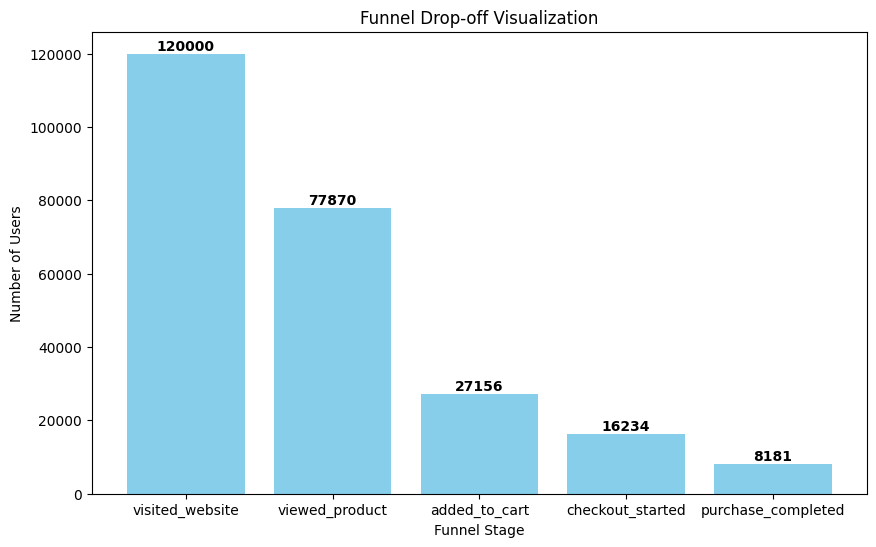

In [26]:
# Funnel stages counts
stages = ['visited_website', 'viewed_product', 'added_to_cart', 'checkout_started', 'purchase_completed']
counts = [df[stage].sum() for stage in stages]

# Plot funnel
plt.figure(figsize=(10,6))
plt.bar(stages, counts, color='skyblue')
plt.title('Funnel Drop-off Visualization')
plt.ylabel('Number of Users')
plt.xlabel('Funnel Stage')
for i, v in enumerate(counts):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')
plt.show()


In [27]:
# monthly analysis
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month if not already clean
df['month'] = df['date'].dt.to_period('M')

monthly_analysis = df.groupby('month').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
)

# Conversion rate
monthly_analysis['conversion_rate_%'] = (
    monthly_analysis['purchases'] / monthly_analysis['total_sessions'] * 100
)

# Revenue per session
monthly_analysis['revenue_per_session'] = (
    monthly_analysis['total_revenue'] / monthly_analysis['total_sessions']
)

monthly_analysis

,total_sessions,purchases,total_revenue,conversion_rate_%,revenue_per_session
month,,,,,
2025-07,20747,1437,2987535.546,6.926303,143.998436
2025-08,20489,1372,2842661.150,6.696276,138.740844
2025-09,20167,1424,2963807.720,7.061040,146.963243
2025-10,20625,1401,2943950.181,6.792727,142.736978
2025-11,19914,1316,2741497.933,6.608416,137.666864
2025-12,18058,1231,2537146.624,6.816923,140.499868


In [43]:
# discount analysis
# Convert discount_applied to binary 0/1
df['discount_applied_bin'] = df['discount_applied'].map({'Yes': 1, 'No': 0})

# Verify conversion
df['discount_applied_bin'].value_counts()

# Overall conversion with vs without discount
discount_analysis = df.groupby('discount_applied_bin').agg(
    total_sessions=('session_id', 'count'),
    purchases=('purchase_completed', 'sum')
)

# Conversion rate %
discount_analysis['conversion_rate_%'] = (
    discount_analysis['purchases'] / discount_analysis['total_sessions'] * 100
)

# Revenue per session
discount_analysis['revenue_per_session'] = (
    df.groupby('discount_applied_bin')['revenue'].sum() / discount_analysis['total_sessions']
)

discount_analysis

,total_sessions,purchases,conversion_rate_%,revenue_per_session
discount_applied_bin,,,,
0,115538,3719,3.218854,70.846233
1,4462,4462,100.000000,1979.194772


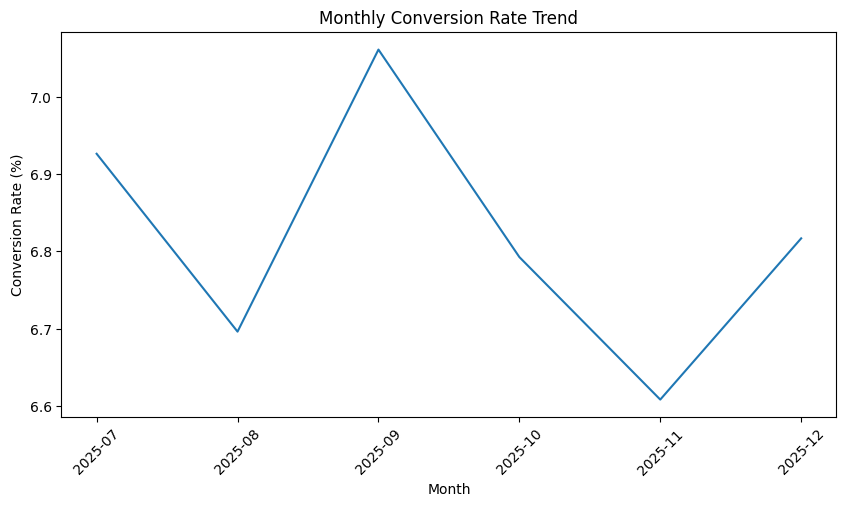

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_analysis.index.astype(str),
         monthly_analysis['conversion_rate_%'])

plt.title("Monthly Conversion Rate Trend")
plt.xlabel("Month")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()

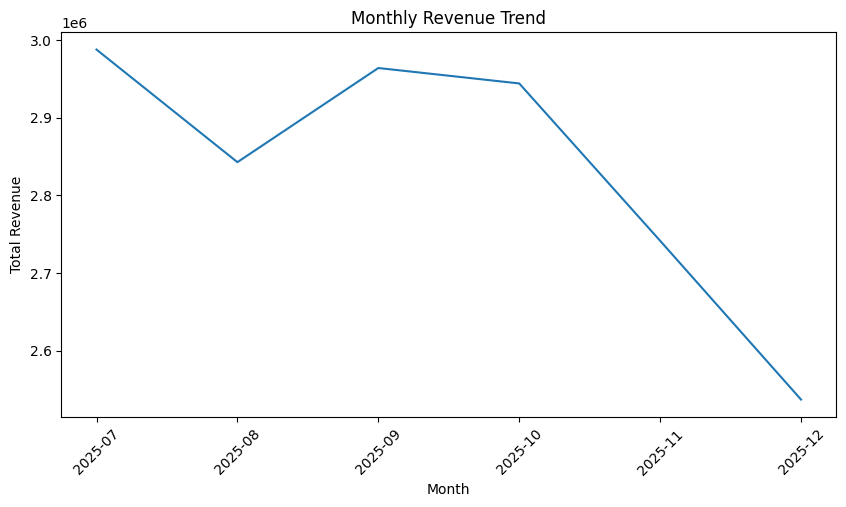

In [29]:
plt.figure(figsize=(10,5))
plt.plot(monthly_analysis.index.astype(str),
         monthly_analysis['total_revenue'])

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [33]:
campaign_month = df.groupby(['month', 'campaign_type']).agg(
    purchases=('purchase_completed', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index()

campaign_month.head(50)

,month,campaign_type,purchases,total_revenue
0,2025-07,Discount,742,1539734.281
1,2025-07,Influencer,287,595126.370
2,2025-07,New Launch,408,852674.895
3,2025-08,Discount,680,1408237.073
4,2025-08,Influencer,291,594292.590
5,2025-08,New Launch,401,840131.487
6,2025-09,Discount,724,1514304.689
7,2025-09,Influencer,253,523315.153
8,2025-09,New Launch,447,926187.878
9,2025-10,Discount,711,1495661.279


In [36]:
# First, filter for users who viewed the product
df_viewed = df[df['viewed_product'] == 1]

# Define a function to calculate drop-off metrics
def funnel_stage_analysis(data, group_col, stage_from='viewed_product', stage_to='added_to_cart'):
    analysis = data.groupby(group_col).agg(
        viewed_count=(stage_from, 'sum'),
        added_count=(stage_to, 'sum')
    )
    analysis['conversion_%'] = analysis['added_count'] / analysis['viewed_count'] * 100
    analysis['drop_off_count'] = analysis['viewed_count'] - analysis['added_count']
    return analysis.sort_values(by='conversion_%', ascending=False)

# Drop-off by Channel
channel_dropoff = funnel_stage_analysis(df_viewed, 'channel')
print("View → Cart Drop-off by Channel:\n", channel_dropoff)

# Drop-off by Device
device_dropoff = funnel_stage_analysis(df_viewed, 'device')
print("\nView → Cart Drop-off by Device:\n", device_dropoff)

# Drop-off by Campaign Type
campaign_dropoff = funnel_stage_analysis(df_viewed, 'campaign_type')
print("\nView → Cart Drop-off by Campaign Type:\n", campaign_dropoff)


View → Cart Drop-off by Channel:
           viewed_count  added_count  conversion_%  drop_off_count
channel                                                          
Email             7892         2838     35.960466            5054
Social           11640         4102     35.240550            7538
Organic          23327         8158     34.972350           15169
Paid Ads         35011        12058     34.440604           22953

View → Cart Drop-off by Device:
          viewed_count  added_count  conversion_%  drop_off_count
device                                                          
Mobile          54497        19016     34.893664           35481
Desktop         23373         8140     34.826509           15233

View → Cart Drop-off by Campaign Type:
                viewed_count  added_count  conversion_%  drop_off_count
campaign_type                                                         
Influencer            15423         5465     35.434092            9958
Discount              

In [37]:
# First, calculate AOV for users who added to cart
df_added = df[df['added_to_cart'] == 1]

# Compute average revenue per added-to-cart session
aov = df_added['order_value'].mean()  # or 'revenue' column if net revenue

print(f"Average order value (AOV) for added-to-cart users: {aov:.2f}")

# Function to estimate lost revenue at View -> Cart stage
def lost_revenue_view_cart(data, group_col):
    # Users who viewed product
    df_viewed = data[data['viewed_product'] == 1]
    
    # Drop-off count
    dropoff_data = df_viewed.groupby(group_col).agg(
        viewed_count=('viewed_product', 'sum'),
        added_count=('added_to_cart', 'sum')
    )
    dropoff_data['drop_off_count'] = dropoff_data['viewed_count'] - dropoff_data['added_count']
    
    # Estimate lost revenue
    dropoff_data['lost_revenue'] = dropoff_data['drop_off_count'] * aov
    return dropoff_data.sort_values(by='lost_revenue', ascending=False)

# Lost Revenue by Channel
lost_rev_channel = lost_revenue_view_cart(df, 'channel')
print("Estimated Lost Revenue by Channel:\n", lost_rev_channel)

# Lost Revenue by Device
lost_rev_device = lost_revenue_view_cart(df, 'device')
print("\nEstimated Lost Revenue by Device:\n", lost_rev_device)

# Lost Revenue by Campaign
lost_rev_campaign = lost_revenue_view_cart(df, 'campaign_type')
print("\nEstimated Lost Revenue by Campaign:\n", lost_rev_campaign)


Average order value (AOV) for added-to-cart users: 1011.43
Estimated Lost Revenue by Channel:
           viewed_count  added_count  drop_off_count  lost_revenue
channel                                                          
Paid Ads         35011        12058           22953  2.321533e+07
Organic          23327         8158           15169  1.534237e+07
Social           11640         4102            7538  7.624152e+06
Email             7892         2838            5054  5.111762e+06

Estimated Lost Revenue by Device:
          viewed_count  added_count  drop_off_count  lost_revenue
device                                                          
Mobile          54497        19016           35481  3.588651e+07
Desktop         23373         8140           15233  1.540710e+07

Estimated Lost Revenue by Campaign:
                viewed_count  added_count  drop_off_count  lost_revenue
campaign_type                                                         
Discount              38950      

In [56]:
pip install pandas xlsxwriter openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Hp\hafsa-projects\venv\Scripts\python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd

# Suppose your DataFrame is called df
# Make sure all column names are strings
df.columns = df.columns.astype(str)

# Convert all boolean/object columns to something Excel can handle
df_clean = df.copy()

# Save to Excel using openpyxl
df_clean.to_excel("E-Commerce_Funnel_Analysis.xlsx", index=False, engine='openpyxl')